In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
 

from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

import sklearn as sklearn
 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)

In [3]:
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [4]:
# Setting this option will print all rows di je none, jer mi se nije sve ispisivalo
#pd.set_option('max_rows', 100)
# za nove pande
pd.options.display.max_rows = 100

In [5]:
trainhouse = pd.read_csv('trainhouse.csv')

In [6]:
testhouse = pd.read_csv('testhouse.csv')
#50% uzeli za test

In [7]:
trainhouse.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [8]:
trainvisual = trainhouse.iloc[:,1:81]
trainvisual.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
trainhouse.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
# LotFrontage       259
# Alley            1369 
# BsmtQual           37
# BsmtCond           37
# BsmtExposure       38
# BsmtFinType1       37
# BsmtFinType2       38
# Electrical          1
# FireplaceQu       690
# GarageType         81
# GarageYrBlt        81
# GarageFinish       81
# GarageQual         81
# GarageCond         81
# PoolQC           1453
# Fence            1179
# MiscFeature      1406
# MasVnrType          8
# MasVnrArea          8

#sve su tipovi za bins, mogu se grupirat preko encodea u svakoj koloni ili brojevi

In [11]:
#i will check on datatypes of columns
#i will use it do divide categorical from numeric variables and then tobe able to fill nan values with mode or median or mean
#or some selected value i will see
trainhouse.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [12]:


trainhouse[['LotFrontage','MasVnrArea','GarageYrBlt']] = trainhouse[['LotFrontage','MasVnrArea','GarageYrBlt']].fillna(trainhouse[['LotFrontage','MasVnrArea','GarageYrBlt']].median(axis=0))

In [13]:
trainhouse['Alley'] = trainhouse['Alley'].fillna(trainhouse['Alley'].astype('string').mode()[0])
#mode bas ove kolone

In [14]:
trainhouse['BsmtQual'] = trainhouse['BsmtQual'].fillna(trainhouse['BsmtQual'].astype('string').mode()[0])


In [15]:
trainhouse['BsmtCond'] = trainhouse['BsmtCond'].fillna(trainhouse['BsmtCond'].astype('string').mode()[0])

In [16]:
trainhouse['BsmtExposure'] = trainhouse['BsmtExposure'].fillna(trainhouse['BsmtExposure'].astype('string').mode()[0])
trainhouse['BsmtFinType1'] = trainhouse['BsmtFinType1'].fillna(trainhouse['BsmtFinType1'].astype('string').mode()[0])
trainhouse['BsmtFinType2'] = trainhouse['BsmtFinType2'].fillna(trainhouse['BsmtFinType2'].astype('string').mode()[0])
trainhouse['Electrical'] = trainhouse['Electrical'].fillna(trainhouse['Electrical'].astype('string').mode()[0])                                                        
trainhouse['FireplaceQu'] = trainhouse['FireplaceQu'].fillna(trainhouse['FireplaceQu'].astype('string').mode()[0])   
trainhouse['GarageType'] = trainhouse['GarageType'].fillna(trainhouse['GarageType'].astype('string').mode()[0])  
trainhouse['GarageYrBlt'] = trainhouse['GarageYrBlt'].fillna(trainhouse['GarageYrBlt'].astype('string').mode()[0]) 
trainhouse['GarageFinish'] = trainhouse['GarageFinish'].fillna(trainhouse['GarageFinish'].astype('string').mode()[0])
trainhouse['GarageQual'] = trainhouse['GarageQual'].fillna(trainhouse['GarageQual'].astype('string').mode()[0])  
trainhouse['GarageCond'] = trainhouse['GarageCond'].fillna(trainhouse['GarageCond'].astype('string').mode()[0])  
trainhouse['PoolQC'] = trainhouse['PoolQC'].fillna(trainhouse['PoolQC'].astype('string').mode()[0])  
trainhouse['PoolQC'] = trainhouse['PoolQC'].fillna(trainhouse['PoolQC'].astype('string').mode()[0])  
trainhouse['Fence'] = trainhouse['Fence'].fillna(trainhouse['Fence'].astype('string').mode()[0])  
trainhouse['MiscFeature'] = trainhouse['MiscFeature'].fillna(trainhouse['MiscFeature'].astype('string').mode()[0]) 
trainhouse['MasVnrType'] = trainhouse['MasVnrType'].fillna(trainhouse['MasVnrType'].astype('string').mode()[0])  



In [17]:
trainhouse.isnull().sum().sum()

0

In [18]:
trainhouse.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Gd,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Gd,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Gd,MnPrv,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Gd,MnPrv,Shed,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GL

In [19]:
testhouse.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [20]:
testhouse.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [21]:
# MSZoning            
# LotFrontage*       
# Alley            
# Utilities           
# Exterior1st         
# Exterior2nd         
# MasVnrType         
# MasVnrArea *        
# BsmtQual           
# BsmtCond           
# BsmtExposure       
# BsmtFinType1       
# BsmtFinSF1 *        
# BsmtFinType2       
# BsmtFinSF2 *         
# BsmtUnfSF *          
# TotalBsmtSF *        
# BsmtFullBath*        
# BsmtHalfBath *     
# KitchenQual         
# Functional          
# FireplaceQu      
# GarageType        
# GarageYrBlt *      
# GarageFinish       
# GarageCars  *     
# GarageArea *        
# GarageQual         
# GarageCond         
# PoolQC           
# Fence            
# MiscFeature      
# SaleType         

In [22]:
testhouse.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [23]:
for column in ['MSZoning','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','KitchenQual','Functional','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual','GarageCond','PoolQC','Fence','MiscFeature','SaleType']:
    testhouse[column] = testhouse[column].fillna(testhouse[column].mode()[0])
 

In [24]:
testhouse.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      227
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [25]:

testhouse[['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 'GarageCars','GarageArea','GarageYrBlt']] = testhouse[['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','GarageYrBlt']].fillna(testhouse[['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','GarageYrBlt']].median(axis=0))

In [26]:
testhouse.isnull().sum().sum()

0

In [27]:
#encoding


In [28]:
trainhouse.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [29]:
#another way
#i took categorical variables which had null, addedthose that needed encoding and even didnt have nulls before and also
#encoded month year and some numeric variables, so that they just belong to different category and dont bring different values to
#the result (same as different numbers from 1 to 5 maybe should just mean different style and not bring 
#bigger value if style is 4th and not 2nd)
encodecolstrain= ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle', 'YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual', 'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']

for col in encodecolstrain:
    trainhouse[col]=le.fit_transform(trainhouse[col])
    print(le.classes_)
    
trainhouse.head(5)
                         

[ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]
['C (all)' 'FV' 'RH' 'RL' 'RM']
['Grvl' 'Pave']
['Grvl' 'Pave']
['IR1' 'IR2' 'IR3' 'Reg']
['Bnk' 'HLS' 'Low' 'Lvl']
['AllPub' 'NoSeWa']
['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
['Gtl' 'Mod' 'Sev']
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']
['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
[1872 1875 1880 1882 1885 1890 1892 1893 1898 1900 1904 1905 1906 1908
 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923
 1924 1925 1926 1927 1928 1929 1930 1931 1932 1934 1935 1936 1937 1938
 1939 1940 1941 1942 1945 1946 1947 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,104,53,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,89,1,2,548,4,4,2,0,61,0,0,0,0,2,2,2,0,1,2,8,4,208500
1,2,0,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,77,26,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,62,1,2,460,4,4,2,298,0,0,0,0,0,2,2,2,0,4,1,8,4,181500
2,3,5,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,102,52,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,87,1,2,608,4,4,2,0,42,0,0,0,0,2,2,2,0,8,2,8,4,223500
3,4,6,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,19,20,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,84,2,3,642,4,4,2,0,35,272,0,0,0,2,2,2,0,1,0,8,0,140000
4,5,5,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,101,50,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,86,1,3,836,4,4,2,192,84,0,0,0,0,2,2,2,0,11,2,8,4,250000


In [30]:
#another way
#i took categorical variables which had null, addedthose that needed encoding and even didnt have nulls before and also
#encoded month year and some numeric variables, so that they just belong to different category and dont bring different values to
#the result (same as different numbers from 1 to 5 maybe should just mean different style and not bring 
#bigger value if style is 4th and not 2nd)
encodecolstest= ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle', 'YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual', 'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']

for col in encodecolstest:
    testhouse[col]=le.fit_transform(testhouse[col])
    print(le.classes_)
    
testhouse.head(5)
                        

[ 20  30  40  45  50  60  70  75  80  85  90 120 150 160 180 190]
['C (all)' 'FV' 'RH' 'RL' 'RM']
['Grvl' 'Pave']
['Grvl' 'Pave']
['IR1' 'IR2' 'IR3' 'Reg']
['Bnk' 'HLS' 'Low' 'Lvl']
['AllPub']
['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
['Gtl' 'Mod' 'Sev']
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN']
['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
['1.5Fin' '1.5Unf' '1Story' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
[1879 1880 1890 1895 1896 1900 1901 1902 1905 1907 1910 1912 1914 1915
 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1934 1935 1936 1937 1938 1939 1940 1941 1942 1945 1946
 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0,2,80.0,11622,1,0,3,3,0,4,0,12,1,2,0,2,5,6,56,11,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,2,1,46,2,1.0,730.0,3,4,2,140,0,0,0,120,0,0,2,2,0,5,4,8,4
1,1462,0,3,81.0,14267,1,0,0,3,0,0,0,12,2,2,0,2,6,6,53,8,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,2,1,43,2,1.0,312.0,3,4,2,393,36,0,0,0,0,0,2,0,12500,5,4,8,4
2,1463,5,3,74.0,13830,1,0,0,3,0,4,0,8,2,2,0,4,5,5,92,48,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,82,0,2.0,482.0,3,4,2,212,34,0,0,0,0,0,2,2,0,2,4,8,4
3,1464,5,3,78.0,9978,1,0,0,3,0,4,0,8,2,2,0,4,6,6,93,48,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,83,0,2.0,470.0,3,4,2,360,36,0,0,0,0,0,2,2,0,5,4,8,4
4,1465,11,3,43.0,5005,1,0,0,1,0,4,0,22,2,2,4,2,8,5,87,42,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,2,1,77,1,2.0,506.0,3,4,2,0,82,0,0,144,0,0,2,2,0,0,4,8,4


In [31]:
# from sklearn.preprocessing import StandardScaler
# mms = MinMaxScaler()
# trainhouse[['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','WoodDeckSF','ScreenPorch','MiscVal']] = mms.fit_transform(trainhouse[['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','WoodDeckSF','ScreenPorch','MiscVal']])

In [32]:
trainhouse.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,104,53,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,89,1,2,548,4,4,2,0,61,0,0,0,0,2,2,2,0,1,2,8,4,208500
1,2,0,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,77,26,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,62,1,2,460,4,4,2,298,0,0,0,0,0,2,2,2,0,4,1,8,4,181500
2,3,5,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,102,52,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,87,1,2,608,4,4,2,0,42,0,0,0,0,2,2,2,0,8,2,8,4,223500
3,4,6,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,19,20,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,84,2,3,642,4,4,2,0,35,272,0,0,0,2,2,2,0,1,0,8,0,140000
4,5,5,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,101,50,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,86,1,3,836,4,4,2,192,84,0,0,0,0,2,2,2,0,11,2,8,4,250000


In [33]:
# # def log (x):
# #     return np.log1p(x)
# # #i created a function to normalize data with log, but with logplus1 because od 0 values in some cells, so log would give 
# # #an error, it's not possible because it is undefined.if base is biggerthen 1 it is minus infonity

# trainhouse1 = trainhouse[['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','WoodDeckSF','ScreenPorch','MiscVal']].apply(log)

In [34]:
# trainhouse1.head()

In [35]:
# trainhouse.head()


In [36]:
# trainhouse[['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','WoodDeckSF','ScreenPorch','MiscVal']] = trainhouse1[['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','WoodDeckSF','ScreenPorch','MiscVal']]

In [37]:
trainhouse.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,104,53,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,89,1,2,548,4,4,2,0,61,0,0,0,0,2,2,2,0,1,2,8,4,208500
1,2,0,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,77,26,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,62,1,2,460,4,4,2,298,0,0,0,0,0,2,2,2,0,4,1,8,4,181500
2,3,5,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,102,52,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,87,1,2,608,4,4,2,0,42,0,0,0,0,2,2,2,0,8,2,8,4,223500
3,4,6,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,19,20,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,84,2,3,642,4,4,2,0,35,272,0,0,0,2,2,2,0,1,0,8,0,140000
4,5,5,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,101,50,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,86,1,3,836,4,4,2,192,84,0,0,0,0,2,2,2,0,11,2,8,4,250000


In [38]:
housevisual = trainhouse.iloc[:,1:81]
housevisual.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,104,53,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,89,1,2,548,4,4,2,0,61,0,0,0,0,2,2,2,0,1,2,8,4,208500
1,0,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,77,26,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,62,1,2,460,4,4,2,298,0,0,0,0,0,2,2,2,0,4,1,8,4,181500
2,5,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,102,52,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,87,1,2,608,4,4,2,0,42,0,0,0,0,2,2,2,0,8,2,8,4,223500
3,6,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,19,20,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,84,2,3,642,4,4,2,0,35,272,0,0,0,2,2,2,0,1,0,8,0,140000
4,5,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,101,50,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,86,1,3,836,4,4,2,192,84,0,0,0,0,2,2,2,0,11,2,8,4,250000


In [39]:
len(trainhouse.columns)

81

In [40]:
# # def log (x):
# #     return np.log1p(x)

# testhouse1 = testhouse[['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','WoodDeckSF','ScreenPorch','MiscVal']].apply(log)

In [41]:
# testhouse1.head()

In [42]:
# testhouse[['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','WoodDeckSF','ScreenPorch','MiscVal']] = testhouse1[['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','WoodDeckSF','ScreenPorch','MiscVal']]

In [43]:
# testhouse.head()

In [44]:
len(testhouse.columns)

80

In [45]:
#iz train zadanog dataseta X će biti Xtrain koji ću podijeliti na X_train i X_val tj Y_train i Y_val, na cijelom 
#datasetu ću primijeniti crossvalidation umejsto traintestsplita, prije toga izdvojiti Ykolonu
#iz Y zadanog dataseta test data odvojeni će ostati za testiranje kao X_test, nema Y kolone

Xa=trainhouse.iloc[:,1:80]
print(Xa)
#izbacila sam kolonu indeksa  i kolonu cijena koja je Y

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0              5         3         65.0     8450       1      0         3   
1              0         3         80.0     9600       1      0         3   
2              5         3         68.0    11250       1      0         0   
3              6         3         60.0     9550       1      0         0   
4              5         3         84.0    14260       1      0         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455           5         3         62.0     7917       1      0         3   
1456           0         3         85.0    13175       1      0         3   
1457           6         3         66.0     9042       1      0         3   
1458           0         3         68.0     9717       1      0         3   
1459           0         3         75.0     9937       1      0         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition

In [46]:
X=trainhouse.iloc[:,1:80]
print(X)

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0              5         3         65.0     8450       1      0         3   
1              0         3         80.0     9600       1      0         3   
2              5         3         68.0    11250       1      0         0   
3              6         3         60.0     9550       1      0         0   
4              5         3         84.0    14260       1      0         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455           5         3         62.0     7917       1      0         3   
1456           0         3         85.0    13175       1      0         3   
1457           6         3         66.0     9042       1      0         3   
1458           0         3         68.0     9717       1      0         3   
1459           0         3         75.0     9937       1      0         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition

In [47]:
Xa.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,104,53,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,89,1,2,548,4,4,2,0,61,0,0,0,0,2,2,2,0,1,2,8,4
1,0,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,77,26,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,62,1,2,460,4,4,2,298,0,0,0,0,0,2,2,2,0,4,1,8,4
2,5,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,102,52,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,87,1,2,608,4,4,2,0,42,0,0,0,0,2,2,2,0,8,2,8,4
3,6,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,19,20,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,84,2,3,642,4,4,2,0,35,272,0,0,0,2,2,2,0,1,0,8,0
4,5,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,101,50,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,86,1,3,836,4,4,2,192,84,0,0,0,0,2,2,2,0,11,2,8,4


In [48]:
len(X.columns)

79

In [49]:
Ya=trainhouse.iloc[:,80]
print(Ya)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [50]:
Y=trainhouse.iloc[:,80]
print(Y)
#sve iz traindataseta i x i y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [51]:
X_test1 = testhouse.iloc[:,1:80]
#izbacila sam kolonu indeksa samo

In [52]:
X_test1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,80.0,11622,1,0,3,3,0,4,0,12,1,2,0,2,5,6,56,11,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,2,1,46,2,1.0,730.0,3,4,2,140,0,0,0,120,0,0,2,2,0,5,4,8,4
1,0,3,81.0,14267,1,0,0,3,0,0,0,12,2,2,0,2,6,6,53,8,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,2,1,43,2,1.0,312.0,3,4,2,393,36,0,0,0,0,0,2,0,12500,5,4,8,4
2,5,3,74.0,13830,1,0,0,3,0,4,0,8,2,2,0,4,5,5,92,48,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,82,0,2.0,482.0,3,4,2,212,34,0,0,0,0,0,2,2,0,2,4,8,4
3,5,3,78.0,9978,1,0,0,3,0,4,0,8,2,2,0,4,6,6,93,48,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,83,0,2.0,470.0,3,4,2,360,36,0,0,0,0,0,2,2,0,5,4,8,4
4,11,3,43.0,5005,1,0,0,1,0,4,0,22,2,2,4,2,8,5,87,42,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,2,1,77,1,2.0,506.0,3,4,2,0,82,0,0,144,0,0,2,2,0,0,4,8,4


In [53]:
len(X_test1.columns)

79

In [54]:
#X = X.astype(int)

In [55]:
#Y = Y.astype(int)

In [56]:
#X_test1 = X_test1.astype(int)

In [57]:
#I will split X on train i val part using cross validation, not train test split here

In [58]:
#kf = KFold(n_splits=5)
#kf.get_n_splits(trainhouse)
#X i Y su mi dio train data koji zelim podilit na cross val dio, xtest nisam jos dirala,

#SVE OK, PODIJELIS KOLONE NA X I Y I ONDA MEDJU NJIJMA CROSS VALIDATION, TJ NA X-U A INDEKSI X-A VUKU Y; 
#SAMO SAM JA OVDJE XI Y NAPRAVILA OD TRAIN DATASETA DA BUDU ZAPRAVO TRAIN I VALIDATION..ALI MOGU JA IZDVOJENI TEST DIO DATASETA
#ZVATI VALIDATION, CESTO TAKO I IDE 
#DA SAM UZELA CIJELI TRAINDATA NEKE TABLICE ZA TRAIN I TESTDATA ZA TEST, DA IMAM YTEST PODATKE, SVE BI DAKLE
#DIJELILA PREKO CROSS VALIDATIONA  PO INDEKSIMA TRAINA A TESTIRALA NA TESTU
# ne znam jesam prvo morala podilit cross val pa izdvojit y onda mozda, ne i u primjeru je ok tako samo si ti sve 
#prije izdvojila iz train dataseta ali ista stvar


In [59]:
# #print(kf)
# k=5
# kf = KFold(n_splits=5, random_state=None, shuffle=False)
# #ovo je sam objekt
# # for i, (train_index, val_index) in enumerate(kf.split(trainhouse)):
# #         print(f"Fold {i}:")
# #         print(f"  Train: index={train_index}")
# #         print(f"  Val:  index={val_index}")
        
#         #preko x-a dobijas indekse za x i y dio

In [60]:
# kf = KFold(n_splits=5)
# kf.get_n_splits(trainhouse)
# #X i Y su mi dio train data koji zelim podilit na cross val dio, xtest nisam jos dirala,
# #ne znam jesam prvo morala podilit cross val pa izdvojit y onda mozda
# #ne dole prikaz bilo bi isto isti indeksi

In [61]:
# print(kf)
# KFold(n_splits=5, random_state=None, shuffle=False)
# for i, (train_index, test_index) in enumerate(kf.split(trainhouse)):
#         print(f"Fold {i}:")
#         print(f"  Train: index={train_index}")
#         print(f"  Test:  index={test_index}")

In [62]:
#LotArea SalePrice

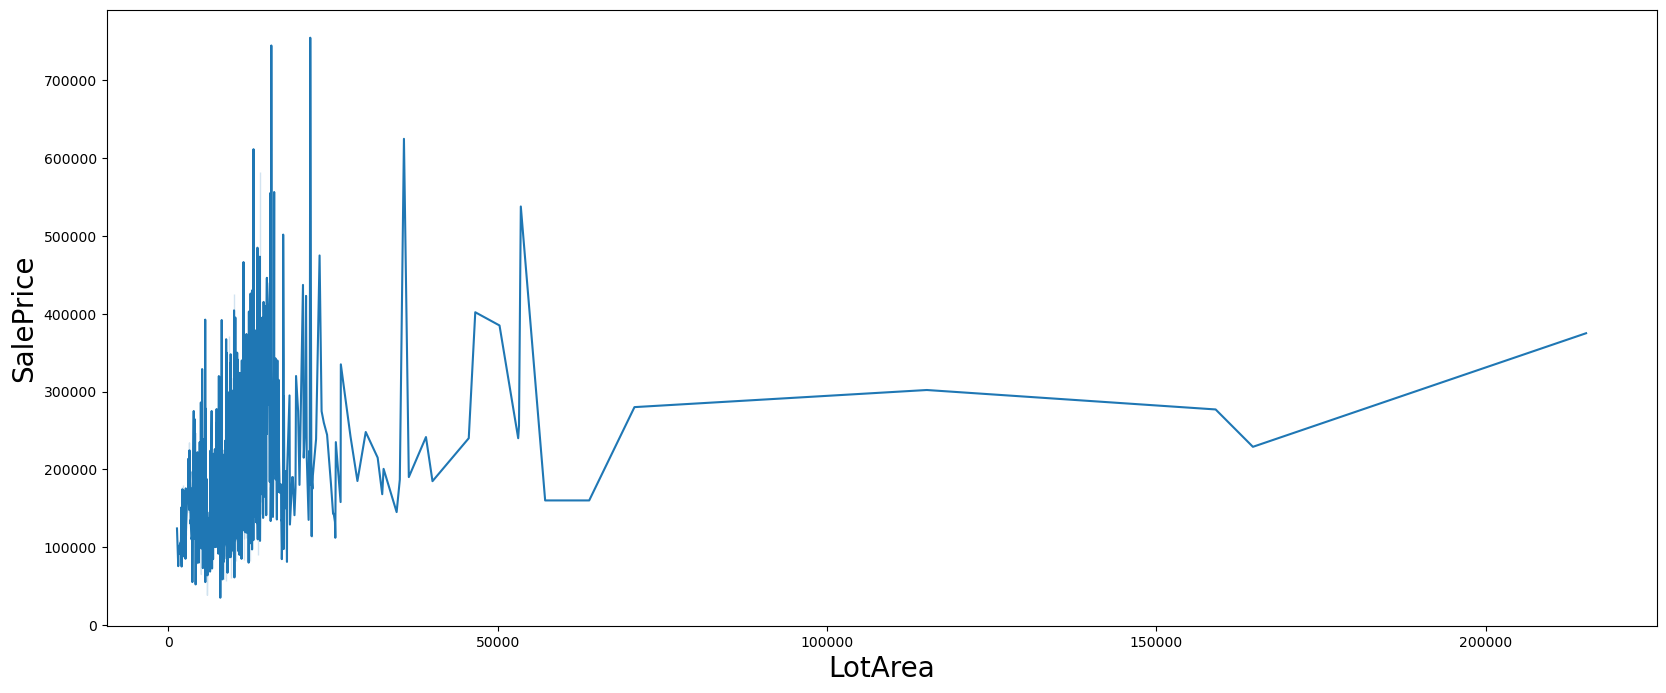

In [63]:
fig, ax = plt.subplots(figsize = (20, 8))
sns.lineplot(data=housevisual, x='LotArea', y='SalePrice')
plt.xlabel('LotArea', fontsize=20)
plt.ylabel('SalePrice',fontsize=20)
plt.pause(0.001)
plt.show()

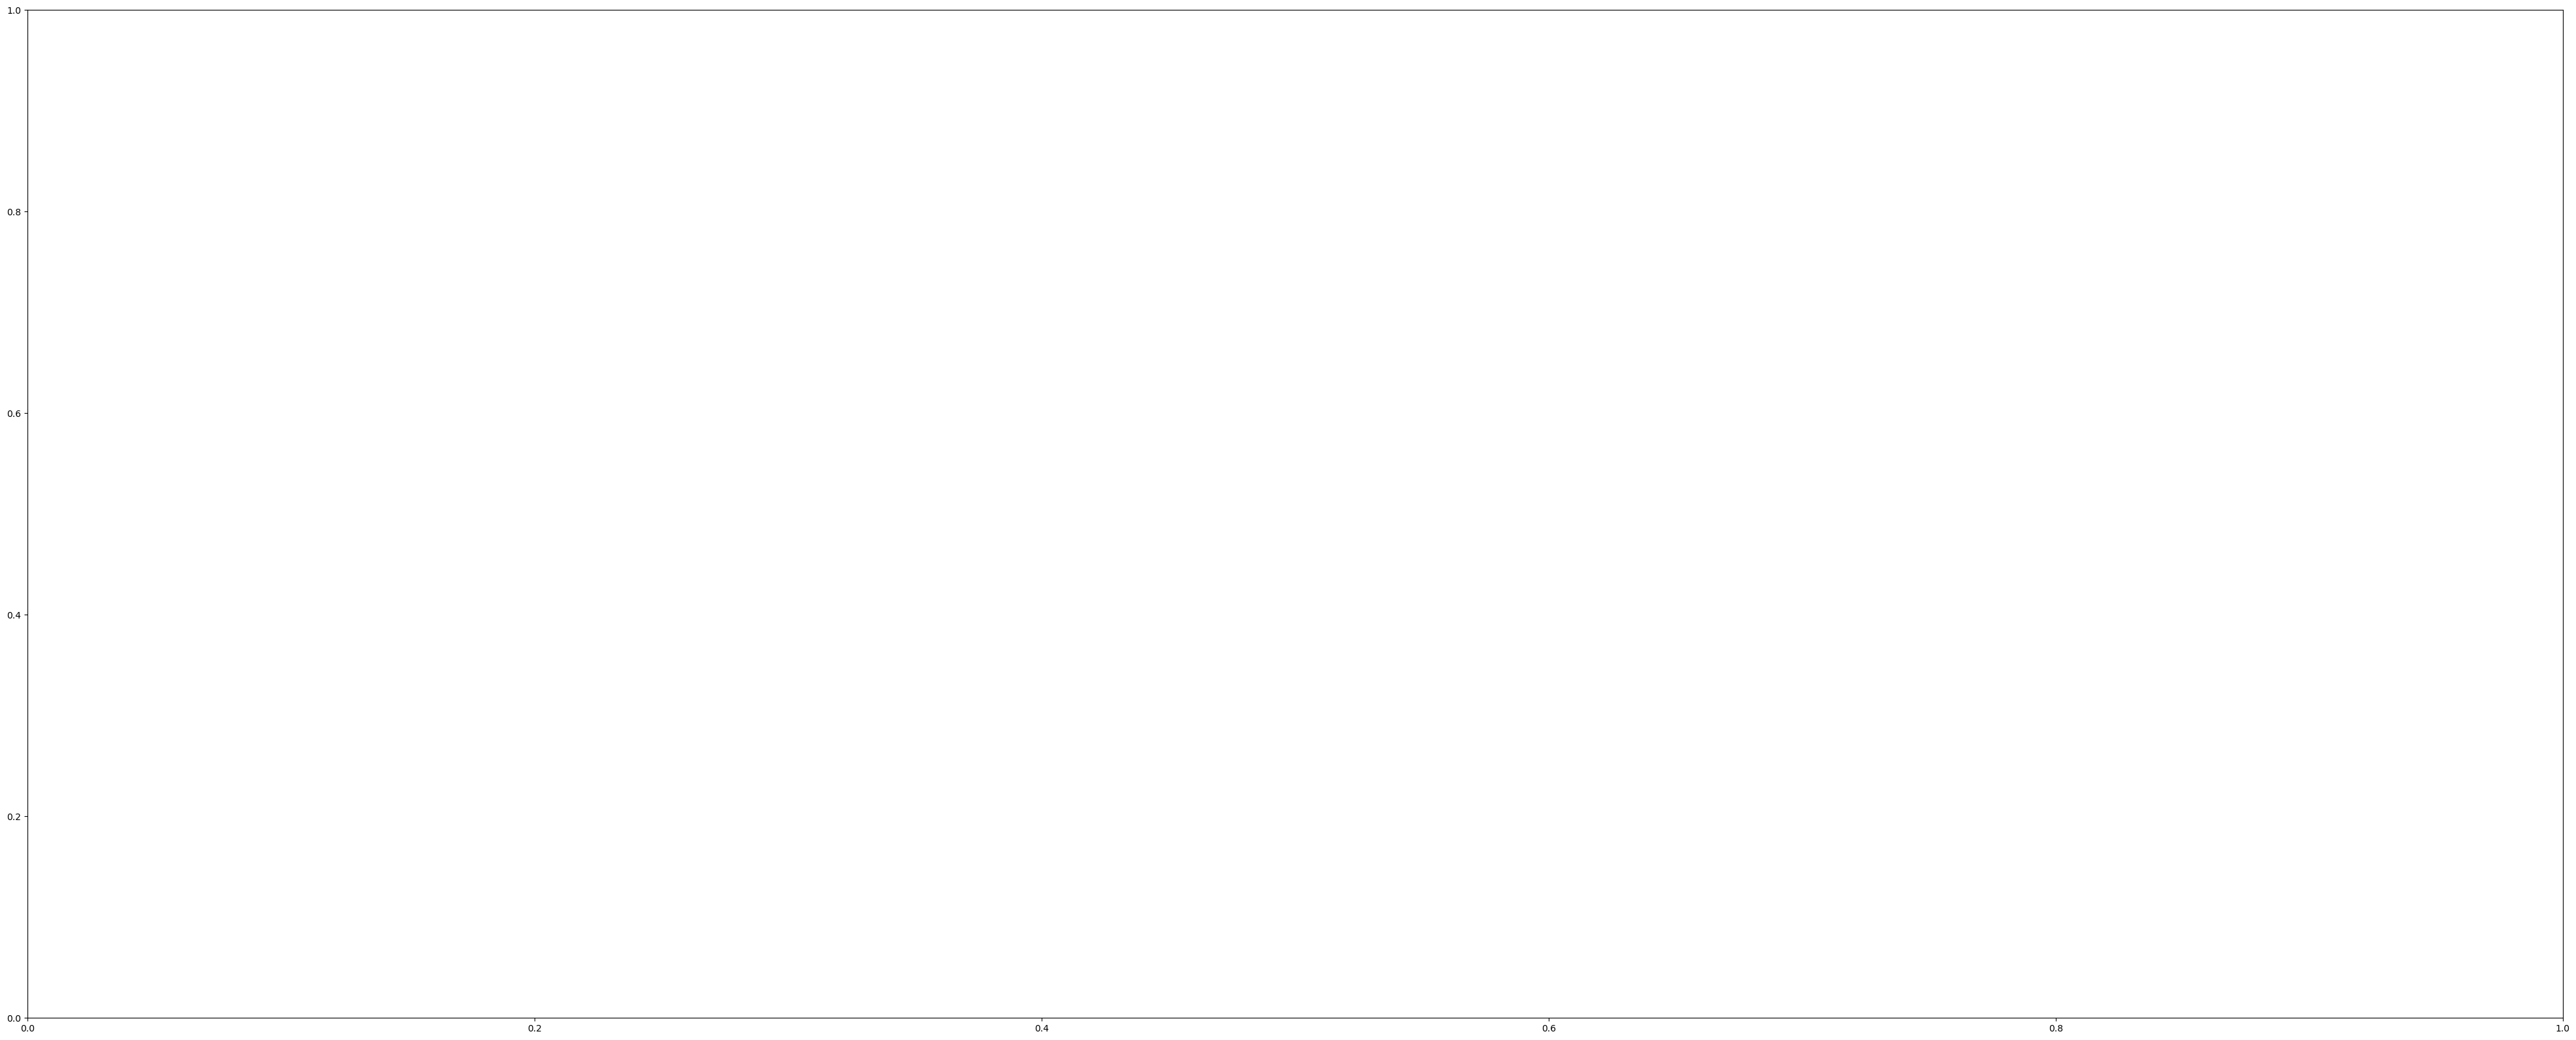

<AxesSubplot:>

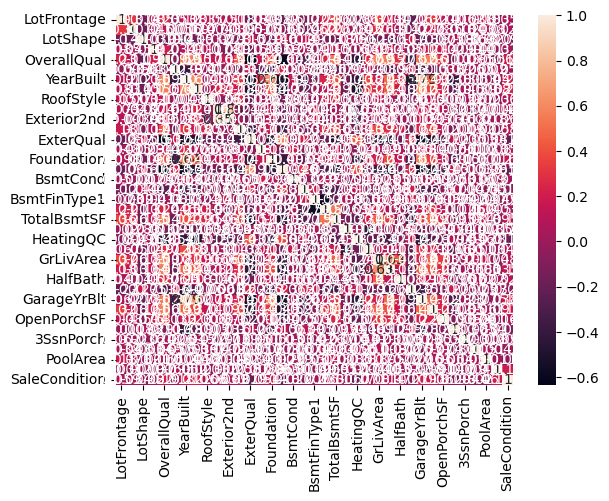

In [64]:

# df = pd.DataFrame(data=housevisual(size=(100, 26)), columns = ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType','SaleCondition','SalePrice']
housevisual2= trainhouse[['LotFrontage','LotArea','LotShape','Neighborhood','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','Exterior1st','Exterior2nd','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','TotalBsmtSF','Heating','HeatingQC','CentralAir','GrLivArea','FullBath','HalfBath','GarageType','GarageYrBlt','GarageArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','SaleType','SaleCondition']]

corr=housevisual2.corr()
plt.subplots(figsize=(50,20))
plt.pause(0.001)
sns.heatmap(corr,annot=True)
                  
                  
                  


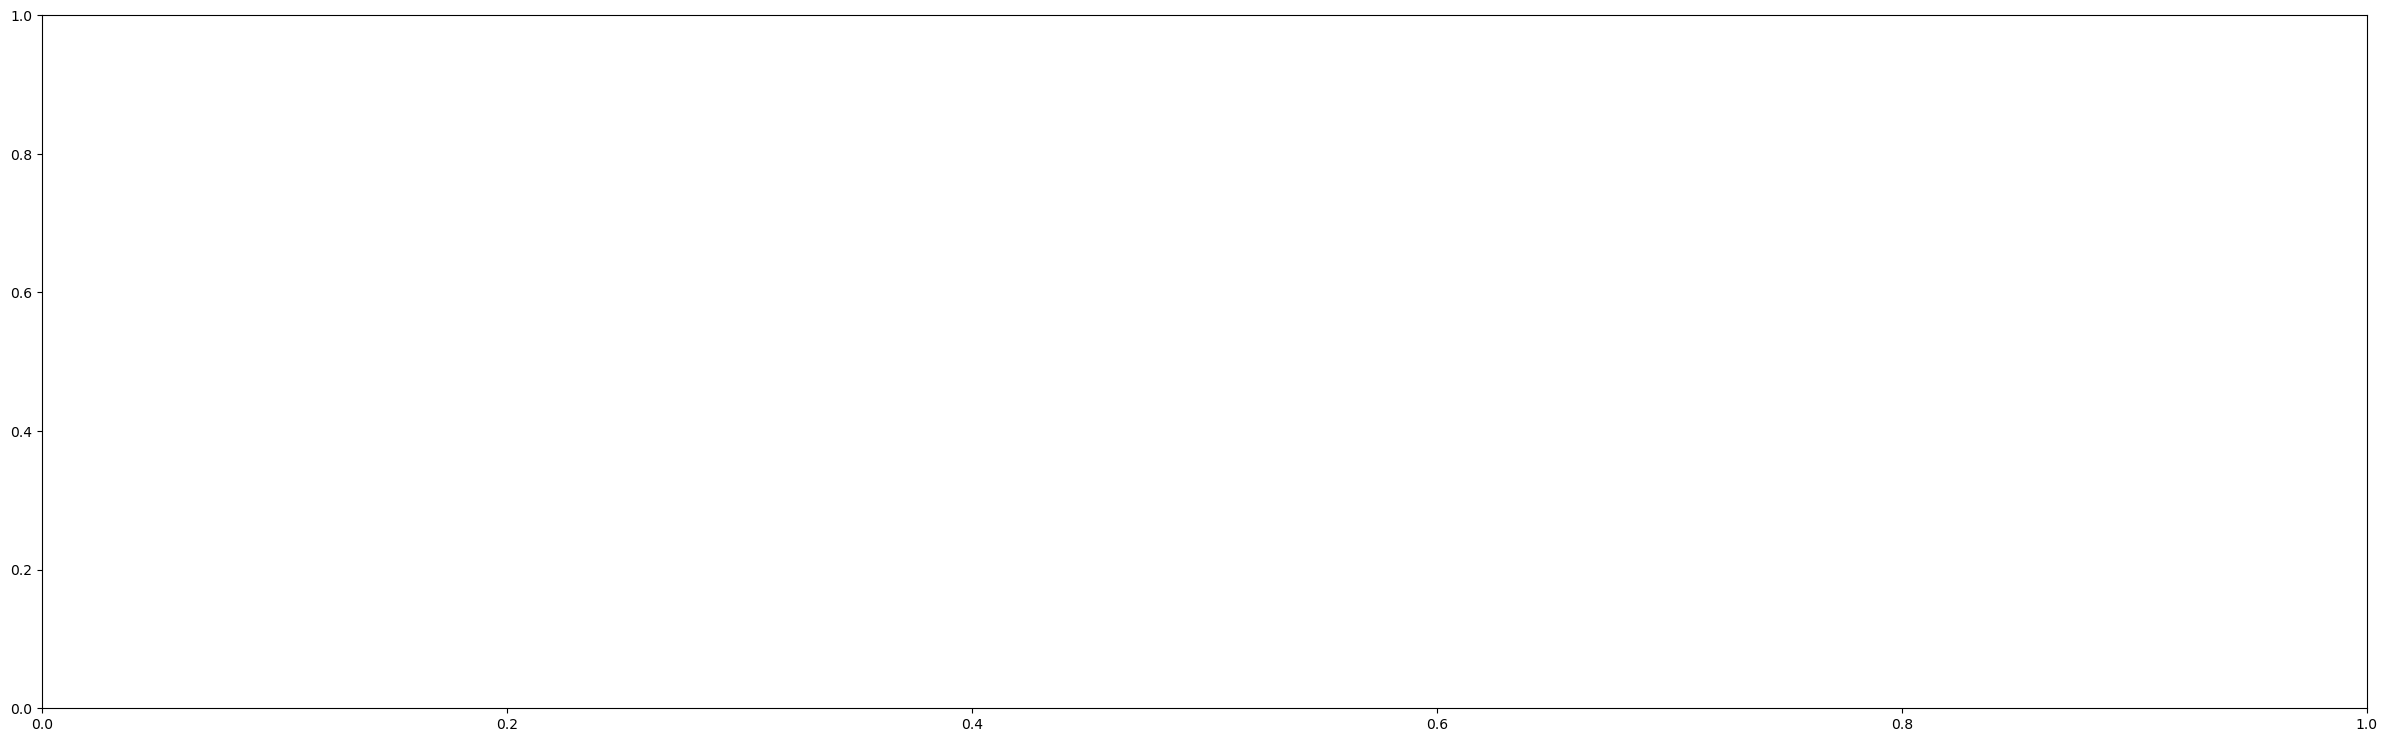

<AxesSubplot:>

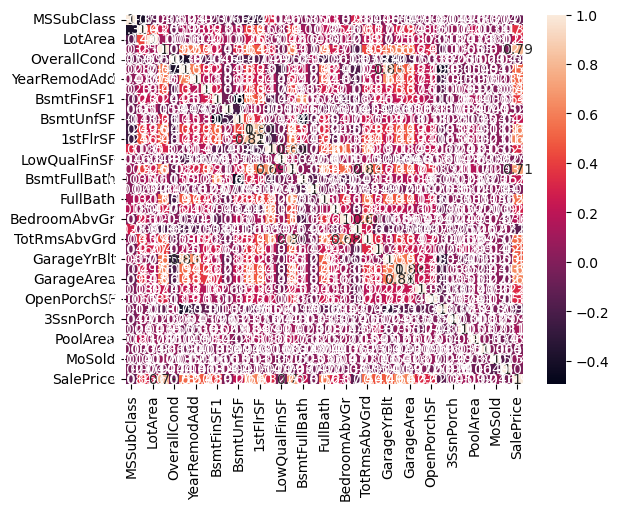

In [65]:
corr=trainvisual.corr()
plt.subplots(figsize=(30,9))
plt.pause(0.001)
sns.heatmap(corr,annot=True)
#first, not normalized data

<AxesSubplot:>

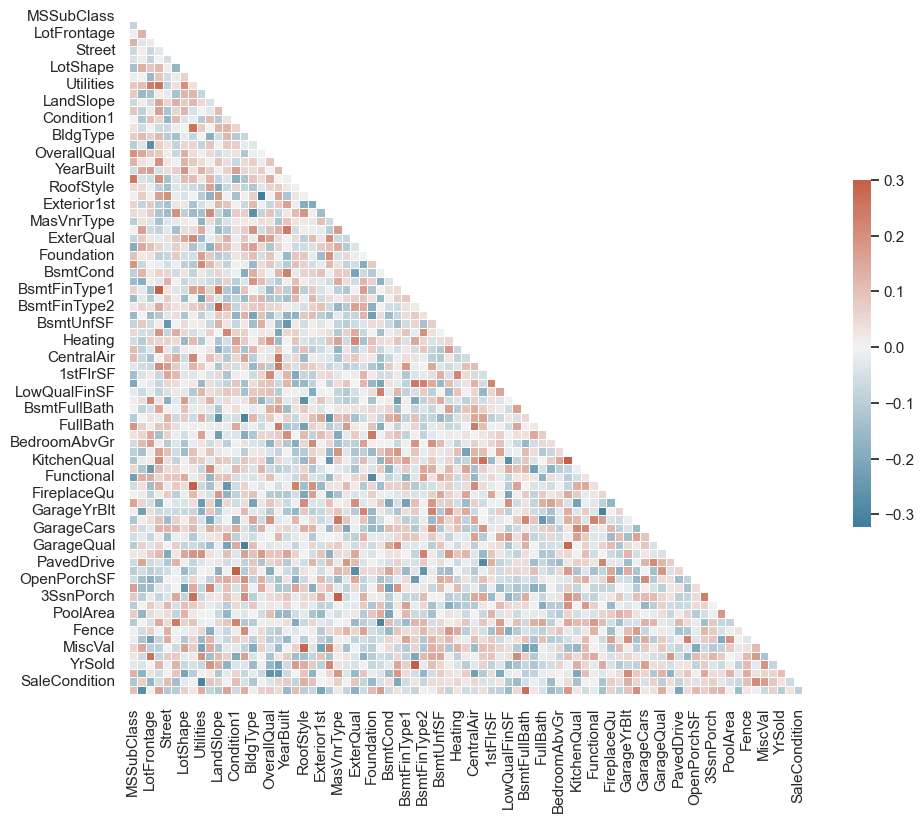

In [66]:
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 80)),
                 columns=trainvisual.columns. values) 

#100*80 radi broja kolona ukupnih

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#source:https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [69]:
 
#kf.split( )

# k = 5
# kf = KFold(n_splits=k, random_state=None)
# for train_index , test_index in kf.split(X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     Y_train , Y_test = Y[train_index] , Y[test_index]
 
# print(f"  Train: index={train_index}")
# print(f"  Test:  index={test_index}")
 
#po indeksima dijelis xcili train i y kolonu

In [70]:
   
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)


In [71]:
X_train.shape

(1168, 79)

In [72]:
Y_train.shape

(1168,)

In [73]:
X_test.shape

(292, 79)

In [74]:
Y_test.shape

(292,)

In [75]:
# for train_index, val_index in kf.split(X,Y)
#     break

In [76]:
#train_index

In [77]:
#val_index

In [78]:
# for train_index, val_index in kf.split(trainhouse):
#     X_train, X_val = X.iloc[train_index,:], X.iloc[train_index,:]
#     Y_train, Y_val = Y[val_index], Y[val_index]
    
#     ili
# X_tr=trainhouse.loc[train_index]
# Y_tr=trainhouse.loc[train_index]
  
# X_vl=trainhouse.loc[val_index]
# Y_vl=trainhouse.loc[val_index]

In [79]:
model = Ridge()
#ja mislim da on već u sebi ima cross validation pa ne moze izvodit




In [80]:
model.fit(X_train, Y_train)

Ridge()

In [81]:
ytrainpredict = model.predict(X_test) 

In [82]:
#Y_test.to_numpy()

In [83]:
#Y_val ranije gore definirala

In [84]:
r_squared =  r2_score(Y_test, ytrainpredict) 

In [85]:
print(r_squared)

0.8409785885826738


In [86]:
model.score(X_test, Y_test)*100

84.09785885826739

In [87]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators = 1000)


In [88]:
model1.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000)

In [89]:
model.score(X_test, Y_test)*100
#mean_squared_error(Y_test, ytrainpredict,squared=False)

84.09785885826739

In [90]:
# from sklearn import datasets
# X_train,Y_train = datasets.load_X(return_X_train_Y_train=True)
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X_train, Y_train, scoring='neg_mean_squared_error')
(-scores)**0.5
#root mean squared error as negative square root of the five scores;
# x**0.5 means x to the 1/2 power; i.e. square root
#resulta along different cross-val iterations, just to try

array([32603.68780807, 36986.66863162, 31282.69480274, 26750.56023023,
       25104.56267312])

In [91]:
#negative mean square error, jer tijekom cross val trazi kao najbolju najvecu vrijednost
#a kad error u pitanju obrnuto, najbolja je najmanja; a square sve cini pozitivnima
#tako da se omoguci trazenje najmanje, minimalne pogreske kao mean square error,
#jer ipak u pitanju pogreska. ; scikit-learn cross validation, negative values with mean squared error

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor(n_estimators = 100, max_depth = 5)


In [93]:
model2.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=5)

In [94]:
model2.score(X_test, Y_test)*100

91.12485227947124

In [95]:
ytrainpredict2 = model2.predict(X_test) 

In [96]:
mean_squared_error(Y_test, ytrainpredict2,squared=False)

26091.239555342865

In [97]:
r_squared2 =  r2_score(Y_test, ytrainpredict2) 

In [98]:
print(r_squared2)

0.9112485227947125


In [99]:
#gradient umist oxgboost
#na statquest ucila 0 i 1 umisto nan za xgboost trazi
#ode za nan modei  median pa gradient bolje
 

In [100]:
# # Alternative code to silence potential errors
# scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X_train, Y_train, scoring='neg_mean_squared_error')